<a href="https://colab.research.google.com/github/Himagination/TensorFlow_Developer/blob/main/03_Computer_Vision_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Architecture of Convolution Neural Network(CNN)

* Input Images: Target images you'd like to discover patterns in.
* Input Layer: Takes in target images and preprocesses them for further layers. input_shape = [batch_size, image_height, image_width, color_channels]
* Convolution Layer: Extract/learns the most important features from target images.
* Hidden Activation: Adds non-linearity to learned features (non-straight lines). Usually ReLU
* Pooling Layer: Reduces the dimensionality of learned image features. Average or Max Pool.
* Fully Connected Layer: Further refines learned features from convolution layers.
* Output layer: Takes learned features and outputs them in shape of target labels. output_shape = [number_of_classes]
* Output Activation: Adds non-linearities to output layer. tf.keras.activations.sigmoid



# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer Vision is the practice of writing algorithms which can discover patterns in visual data, such as the cameras of self-driving car recognizing the car in front.

## Get the data

The images we are working with are from Food101 dataset(101 different classes of food). However, it is modeified to include two classes- pizza & steak.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-17 13:40:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   234MB/s    in 0.4s    

2022-01-17 13:40:58 (234 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with data)

A very crucial step at the beginning of any machine learning project is becoming one with your data.

ANd for a computer vision project,,,this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
import os

# Walk through pizza-steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [5]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (289, 512, 3)


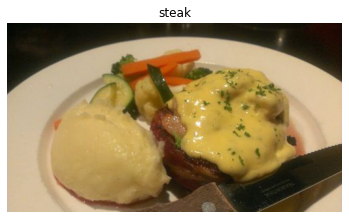

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", 
                        target_class="steak")

In [9]:
img

array([[[  3,   8,   2],
        [  2,   7,   1],
        [  2,   7,   1],
        ...,
        [ 28,   9,   5],
        [ 30,  11,   7],
        [ 32,  13,   9]],

       [[  3,   8,   2],
        [  1,   6,   0],
        [  1,   6,   0],
        ...,
        [ 28,   9,   5],
        [ 29,  10,   6],
        [ 29,  10,   6]],

       [[  2,   7,   1],
        [  1,   6,   0],
        [  1,   6,   0],
        ...,
        [ 29,  10,   6],
        [ 28,   9,   5],
        [ 27,   8,   4]],

       ...,

       [[207, 186, 167],
        [208, 187, 168],
        [208, 187, 166],
        ...,
        [216, 192, 164],
        [216, 192, 166],
        [214, 190, 164]],

       [[207, 186, 167],
        [208, 187, 168],
        [208, 187, 166],
        ...,
        [217, 193, 165],
        [217, 193, 167],
        [215, 191, 165]],

       [[210, 186, 162],
        [213, 189, 165],
        [210, 186, 162],
        ...,
        [217, 193, 169],
        [219, 195, 171],
        [215, 191, 167]]

In [10]:
# Convert the image img array into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(289, 512, 3), dtype=uint8, numpy=
array([[[  3,   8,   2],
        [  2,   7,   1],
        [  2,   7,   1],
        ...,
        [ 28,   9,   5],
        [ 30,  11,   7],
        [ 32,  13,   9]],

       [[  3,   8,   2],
        [  1,   6,   0],
        [  1,   6,   0],
        ...,
        [ 28,   9,   5],
        [ 29,  10,   6],
        [ 29,  10,   6]],

       [[  2,   7,   1],
        [  1,   6,   0],
        [  1,   6,   0],
        ...,
        [ 29,  10,   6],
        [ 28,   9,   5],
        [ 27,   8,   4]],

       ...,

       [[207, 186, 167],
        [208, 187, 168],
        [208, 187, 166],
        ...,
        [216, 192, 164],
        [216, 192, 166],
        [214, 190, 164]],

       [[207, 186, 167],
        [208, 187, 168],
        [208, 187, 166],
        ...,
        [217, 193, 165],
        [217, 193, 167],
        [215, 191, 165]],

       [[210, 186, 162],
        [213, 189, 165],
        [210, 186, 162],
        ...,
        [217, 193, 16

In [11]:
# VIew the image shape
img.shape # Returns width, height, colour channels

(289, 512, 3)

In [12]:
# Get all pixel values between 0 & 1
img/255.

array([[[0.01176471, 0.03137255, 0.00784314],
        [0.00784314, 0.02745098, 0.00392157],
        [0.00784314, 0.02745098, 0.00392157],
        ...,
        [0.10980392, 0.03529412, 0.01960784],
        [0.11764706, 0.04313725, 0.02745098],
        [0.1254902 , 0.05098039, 0.03529412]],

       [[0.01176471, 0.03137255, 0.00784314],
        [0.00392157, 0.02352941, 0.        ],
        [0.00392157, 0.02352941, 0.        ],
        ...,
        [0.10980392, 0.03529412, 0.01960784],
        [0.11372549, 0.03921569, 0.02352941],
        [0.11372549, 0.03921569, 0.02352941]],

       [[0.00784314, 0.02745098, 0.00392157],
        [0.00392157, 0.02352941, 0.        ],
        [0.00392157, 0.02352941, 0.        ],
        ...,
        [0.11372549, 0.03921569, 0.02352941],
        [0.10980392, 0.03529412, 0.01960784],
        [0.10588235, 0.03137255, 0.01568627]],

       ...,

       [[0.81176471, 0.72941176, 0.65490196],
        [0.81568627, 0.73333333, 0.65882353],
        [0.81568627, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 256ms/step - loss: 0.5850 - accuracy: 0.6733 - val_loss: 0.4564 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4368 - accuracy: 0.8033 - val_loss: 0.3494 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4203 - accuracy: 0.8107 - val_loss: 0.4100 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3700 - accuracy: 0.8400 - val_loss: 0.3202 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3118 - accuracy: 0.8667 - val_loss: 0.2972 - val_accuracy: 0.8740


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before(non-CNN, 2 hidden layers, 4 neurons)

Let's built the classifier model which we built in last session from [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.65865&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 1.5121 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 200x parameters than CNN, model_2 performs terribly. Let's try improve it.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 3.7365 - accuracy: 0.6000 - val_loss: 0.5996 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 1.0554 - accuracy: 0.6887 - val_loss: 0.5056 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 1.0699 - accuracy: 0.6753 - val_loss: 1.1544 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5794 - accuracy: 0.7613 - val_loss: 0.5432 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5777 - accuracy: 0.7667 - val_loss: 0.5417 - val_accuracy: 0.7660


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (Visualize, Visualize, Visualize)
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


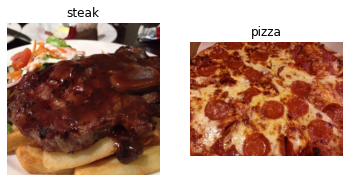

In [19]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all 10,000 images at once, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.


In [21]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setuo when beginning a machine learning experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinte amount of architecture we could create. So one of the best ways to get started with something simple and see if it works on our data and then introduce complexity as required.

* Filters: Decide how many filters should pass over an input tensor. Typical values- 10, 32, 64, 128
* Kernel size(also called filter size): Determines the shape of the filters over the output. Typical values- 3, 5, 7(lower values learn larger features)
* Padding: Pads the target tensor with zeros(is "same") to preserve their input shape. Or leaves in the target tensor as is (if "valid"), lowering output shapes.
* Strides: The number of steps a filter takes across an image at a time.

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [27]:
# get a summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [29]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [30]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 252ms/step - loss: 1.1039 - accuracy: 0.6940 - val_loss: 0.6183 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4683 - accuracy: 0.8060 - val_loss: 0.4092 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3538 - accuracy: 0.8467 - val_loss: 0.3845 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.2023 - accuracy: 0.9327 - val_loss: 0.3821 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.0749 - accuracy: 0.9780 - val_loss: 0.4650 - val_accuracy: 0.8140


### 5. Evaluating our model

It looks like our model is learning something. Let's evaluate it.

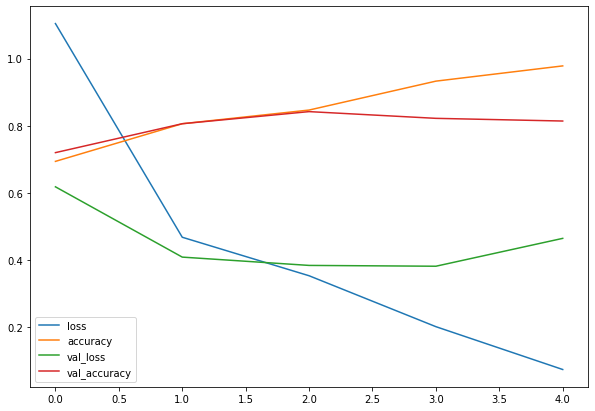

In [31]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [32]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

**Note** When a model's **validation loss** starts to increase, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns *too well* and thus the model's ability to generalise to unseen data will be diminished.

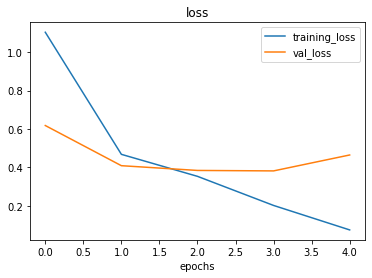

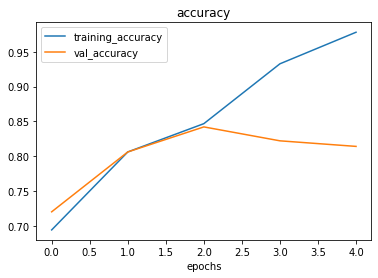

In [33]:
# Check out the loss and accuracy
plot_loss_curves(history_4)

### 6. Adjuts the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a Baseline
1. Beat the beseline by overfitting a larger model.
2. Reduce Overfitting.

Ways to induce overfitting:

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer.

Reduce overfitting:

1. Add data augmentation
2. Add Regularization layers (such as MaxPool2D)
3. Add more data

**Note** Reducing overfitting is also known as **Regularization.**

In [34]:
# create the model(this is going to be new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
                      MaxPool2D(pool_size=2), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Flatten(), 
                      Dense(1, activation='sigmoid')
])

In [35]:
# Compile the model
model_5.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

In [36]:
# Fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6405 - accuracy: 0.6560 - val_loss: 0.4566 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4770 - accuracy: 0.7733 - val_loss: 0.3917 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4282 - accuracy: 0.8173 - val_loss: 0.3563 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4285 - accuracy: 0.8113 - val_loss: 0.4432 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3996 - accuracy: 0.8200 - val_loss: 0.3625 - val_accuracy: 0.8500


In [37]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

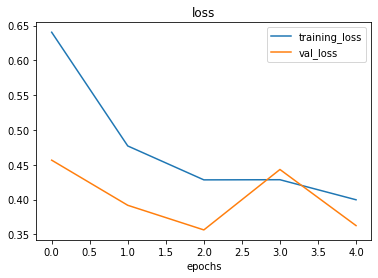

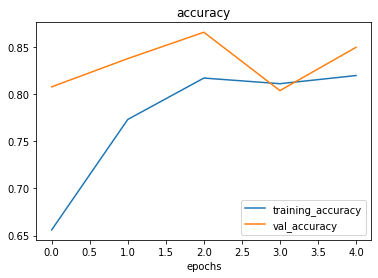

In [38]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation.

Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [39]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, 
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.3, 
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
# Visualiza Data Augmentation
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224), 
                                                                   batch_size=32, 
                                                                   class_mode='binary', 
                                                                   shuffle=False)
# Create non-augmented train data batches
print("Non-augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir, 
                           target_size=(224, 224), 
                           batch_size=32, 
                           class_mode='binary',  
                           shuffle=False)

# Create non-augmented test data batches
print("Non-augmented Testing Data")
test_data = test_datagen.flow_from_directory(test_dir, 
                         target_size=(224, 224), 
                         batch_size=32, 
                         class_mode='binary', 
                         shuffle=False)


Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Testing Data
Found 500 images belonging to 2 classes.


**Note** Data Augmentation is performed only on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in directories but are modified as they're loaded into the model.

In [43]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 25


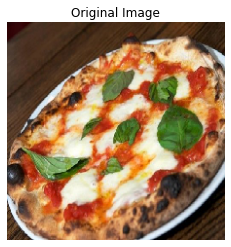

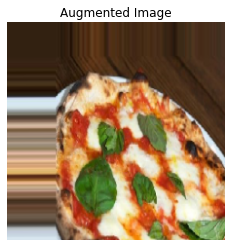

In [50]:
# Show original image and augmented image
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False);

Let's build a model on augmented data see how it learns.

In [52]:
# Create the model (same a smodel_5)
model_6 = Sequential([
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(pool_size=2), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(),  
                      Flatten(), 
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy', 
                optimizer=Adam(), 
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, 
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.7281 - accuracy: 0.5180 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6973 - accuracy: 0.4887 - val_loss: 0.6718 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6938 - accuracy: 0.6167 - val_loss: 0.6319 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6858 - accuracy: 0.6060 - val_loss: 0.6788 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6676 - accuracy: 0.5367 - val_loss: 0.6035 - val_accuracy: 0.7100


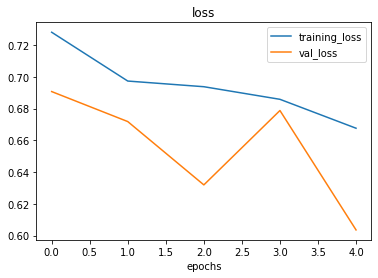

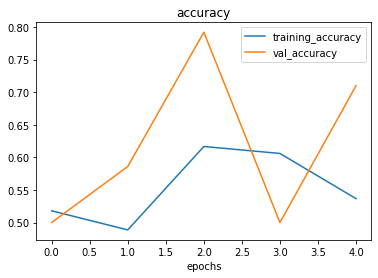

In [53]:
# Plot loss curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model same as before and see what happens.

In [55]:
# Import data, augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                         target_size=(224, 224), 
                                                                         class_mode='binary', 
                                                                         batch_size=32, 
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5, model_6)
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Flatten(), 
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy', 
                optimizer=Adam(), 
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented_shuffled), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 553ms/step - loss: 0.6442 - accuracy: 0.6093 - val_loss: 0.6242 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5940 - accuracy: 0.6913 - val_loss: 0.4877 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5586 - accuracy: 0.7027 - val_loss: 0.3932 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5134 - accuracy: 0.7473 - val_loss: 0.3665 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.4901 - accuracy: 0.7567 - val_loss: 0.3647 - val_accuracy: 0.8360


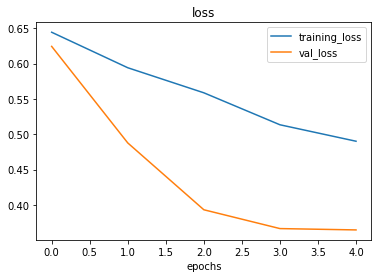

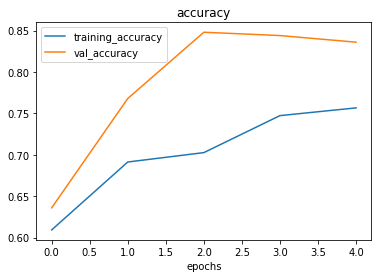

In [59]:
# plot loss curve
plot_loss_curves(history_7)

**Note:** When Shuffling training data, the model gets exposed to all different kinds of data during training and thus enabling it to learn features across wide array of images(in our case pizza & steak at the same time instead of just pizza and just steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learned and adjut it for our use case.

# Multi-class Image Classification

1. Become one with data
2. Preprocess the data(get it ready for model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model(try to beat baseline/reduce overfitting)
7. Repeat until satisfied.

## Import and become one with data

In [60]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2022-01-17 15:26:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   218MB/s    in 2.3s    

2022-01-17 15:26:51 (218 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}")

There are 2 and 0 images in '10_food_classes_all_data
There are 10 and 0 images in '10_food_classes_all_data/test
There are 0 and 250 images in '10_food_classes_all_data/test/grilled_salmon
There are 0 and 250 images in '10_food_classes_all_data/test/chicken_wings
There are 0 and 250 images in '10_food_classes_all_data/test/sushi
There are 0 and 250 images in '10_food_classes_all_data/test/ice_cream
There are 0 and 250 images in '10_food_classes_all_data/test/hamburger
There are 0 and 250 images in '10_food_classes_all_data/test/steak
There are 0 and 250 images in '10_food_classes_all_data/test/pizza
There are 0 and 250 images in '10_food_classes_all_data/test/ramen
There are 0 and 250 images in '10_food_classes_all_data/test/fried_rice
There are 0 and 250 images in '10_food_classes_all_data/test/chicken_curry
There are 10 and 0 images in '10_food_classes_all_data/train
There are 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon
There are 0 and 750 images in '10_food_c

In [62]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [63]:
# Let's get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


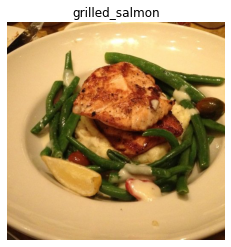

In [71]:
# Visualize , visualize, visualize
import random
img = view_random_image(target_dir=train_dir, 
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224, 224), 
                                             batch_size=32, 
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model(Start with a baseline)

Let's replicate [CNN Explainer Website](https://poloclub.github.io/cnn-explainer/)

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_8 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3)), 
                      Activation(activation='relu'), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Conv2D(10, 3, activation='relu'), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Flatten(), 
                      Dense(10, activation='softmax')                      
])

# Compile the model
model_8.compile(loss='categorical_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

## 4. Fit the model

In [74]:
history_8 = model_8.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 243ms/step - loss: 2.1769 - accuracy: 0.1915 - val_loss: 1.9926 - val_accuracy: 0.2560
Epoch 2/5
235/235 [==============================] - 56s 239ms/step - loss: 1.8703 - accuracy: 0.3452 - val_loss: 1.9484 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 57s 241ms/step - loss: 1.4842 - accuracy: 0.5080 - val_loss: 1.9809 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 0.8706 - accuracy: 0.7164 - val_loss: 2.5130 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 56s 240ms/step - loss: 0.3435 - accuracy: 0.8939 - val_loss: 3.3729 - val_accuracy: 0.2864


## 5. Evaluate the model

In [75]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 3.3729 - accuracy: 0.2864


[3.372860908508301, 0.2863999903202057]

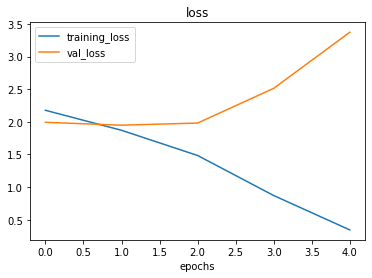

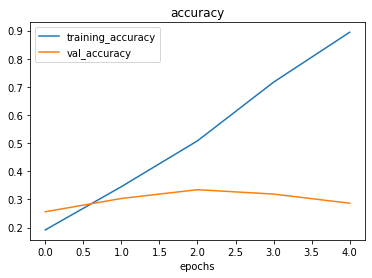

In [76]:
# Check out model's loss curve on the 10 classes
plot_loss_curves(history_8)

The curves above depicts **overfitting**

## 6. Adjust the model hyperparameters(to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something. However, its not generalising well to unseen data(overfitting).

So let's try:

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates training data in such a way to add more diversity to it(without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to our own and allows us to use those patterns on our own dataset.

In [77]:
# How about we try and simplify the model
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
                      MaxPool2D(), 
                      Conv2D(10, 3, activation='relu'), 
                      MaxPool2D(), 
                      Flatten(), 
                      Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

In [78]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [79]:
# Fit the model with 2x COnv layers removed
history_9 = model_9.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.2903 - accuracy: 0.2231 - val_loss: 1.9525 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 51s 215ms/step - loss: 1.7853 - accuracy: 0.3888 - val_loss: 1.9219 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 51s 216ms/step - loss: 1.4706 - accuracy: 0.5135 - val_loss: 1.9682 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.0498 - accuracy: 0.6680 - val_loss: 2.1625 - val_accuracy: 0.3388
Epoch 5/5
235/235 [==============================] - 50s 215ms/step - loss: 0.6721 - accuracy: 0.7949 - val_loss: 2.6033 - val_accuracy: 0.2960


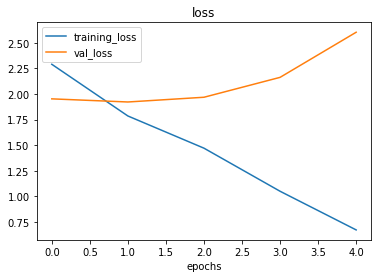

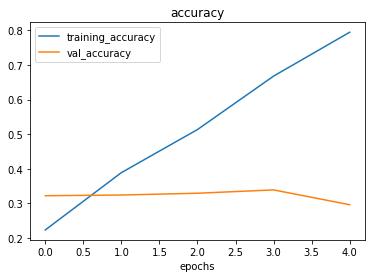

In [80]:
# Check out loss curves
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued.

Let's try Augmentation.

### Trying to reduce overfitting using Augmentation.

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting
* Improve validation accuracy

In [82]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             zoom_range=0.2, 
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [83]:
# Let's create another model and fit it on the augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])

In [84]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [86]:
# Fit the model
history_10 = model_10.fit(train_data_augmented, 
                          epochs=5, 
                          steps_per_epoch=len(train_data_augmented), 
                          validation_data=test_data, 
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 562ms/step - loss: 2.2219 - accuracy: 0.1688 - val_loss: 2.0679 - val_accuracy: 0.2572
Epoch 2/5
235/235 [==============================] - 132s 562ms/step - loss: 2.1086 - accuracy: 0.2475 - val_loss: 1.9759 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 132s 562ms/step - loss: 2.0832 - accuracy: 0.2579 - val_loss: 1.9926 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 132s 560ms/step - loss: 2.0399 - accuracy: 0.2811 - val_loss: 1.9648 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 132s 561ms/step - loss: 2.0161 - accuracy: 0.2919 - val_loss: 1.9001 - val_accuracy: 0.3528


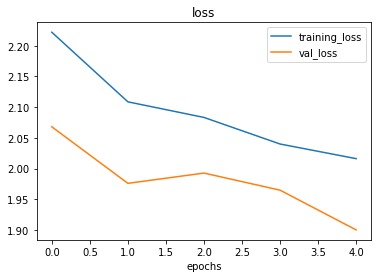

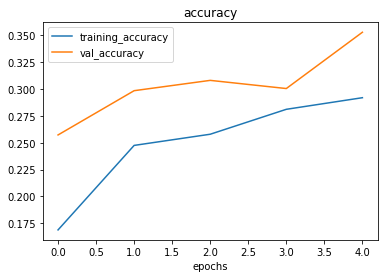

In [88]:
# Check out loss
plot_loss_curves(history_10)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in right direction. We might see better results if we train little longer.

## 7. Repeat until satisfied

